## 복습
- 이전에 풀었던 코드를 기반으로 성능이나 가독성을 높이거나, 성능 등이 떨어지더라도 다른 방법으로 풀어보기

### [체육복](https://school.programmers.co.kr/learn/courses/30/lessons/42862)

- 기존 코드

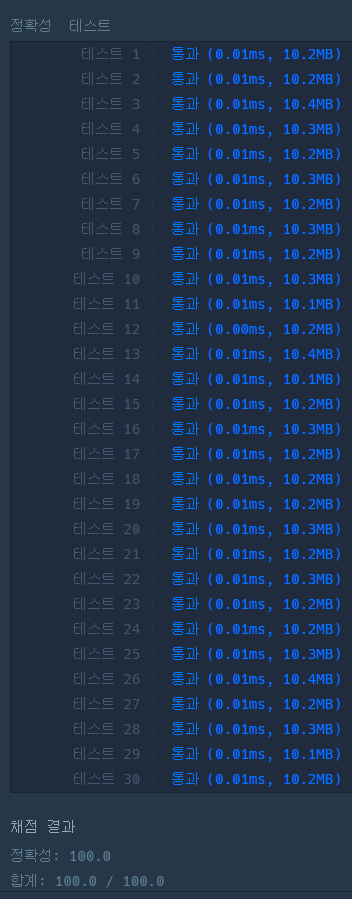

In [ ]:
def solution(n, lost, reserve):
    # 여벌 체육복을 가진 학생이 도난당한 경우를 제거
    reserve_set = set(reserve) - set(lost)
    lost_set = set(lost) - set(reserve)

    answer = n - len(lost_set)  # 처음에는 모든 학생이 수업을 들을 수 있다고 가정

    for student in sorted(lost_set):
        # 바로 앞 번호 학생에게 체육복을 빌릴 수 있는지 확인
        if student - 1 in reserve_set:
            reserve_set.remove(student - 1)
            answer += 1
        # 바로 뒷 번호 학생에게 체육복을 빌릴 수 있는지 확인
        elif student + 1 in reserve_set:
            reserve_set.remove(student + 1)
            answer += 1

    return answer


- 새로 작성한 코드  
: 속도는 비슷하거나 살짝 느리지만, 메모리 측면에서의 소소한 이점이 있음  
: 배열을 이용한 풀이 방식으로 조회수를 조금 줄일 수 있지 않을까해서 처리

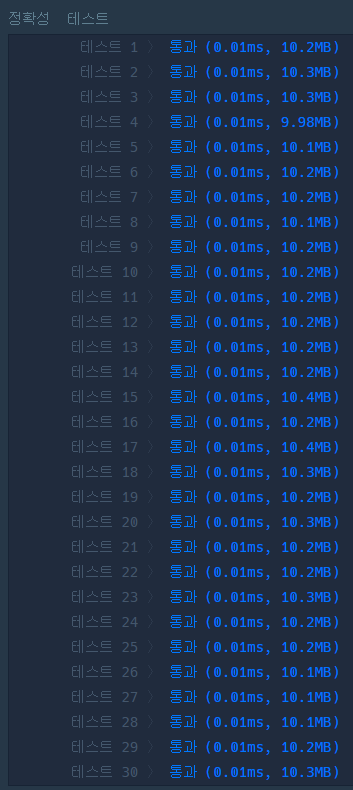

In [ ]:
def solution(n, lost, reserve):
    clothes = [1] * (n + 1)
    
    for l in lost:
        clothes[l] -= 1

    for r in reserve:
        clothes[r] += 1

    for i in range(1, n + 1):
        if clothes[i] == 0:
            if i > 1 and clothes[i - 1] == 2:
                clothes[i - 1] -= 1
                clothes[i] += 1
            elif i < n and clothes[i + 1] == 2:
                clothes[i + 1] -= 1
                clothes[i] += 1

    return sum(1 for c in clothes[1:] if c >= 1)

In [11]:
n, lost, reserve = 5, [2, 4], [1, 3, 5]
solution(n, lost, reserve)

5

### [바탕화면 정리](https://school.programmers.co.kr/learn/courses/30/lessons/161990)

- 기존 코드 : 가독성은 좋으나 조건문 추가로 성능 향상이 가능

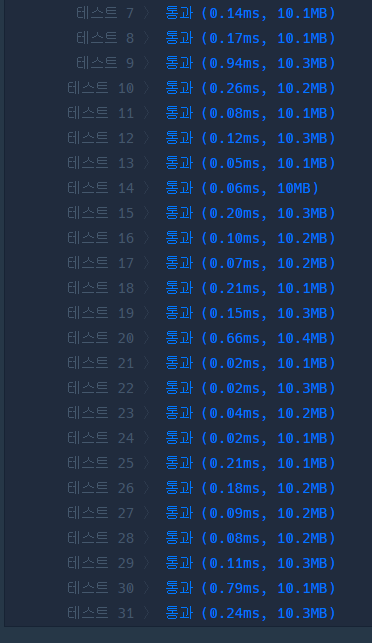

In [ ]:
def solution(wallpaper):
    codes = []
    for idx, wall in enumerate(wallpaper) :
        code = [(idx, x_idx) for x_idx, x in enumerate(wall) if x == '#']
        codes += code
        
    x_min = min(codes, key=lambda x: x[0])[0]
    x_max = max(codes, key=lambda x: x[0])[0]
    y_min = min(codes, key=lambda x: x[1])[1]
    y_max = max(codes, key=lambda x: x[1])[1]
    return [x_min, y_min, x_max+1, y_max+1]

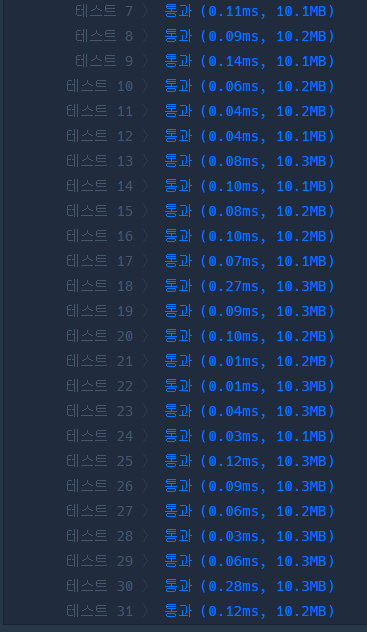

In [ ]:
def solution(wallpaper):    
    y_min = len(wallpaper)
    y_max = 0
    x_min = len(wallpaper[0])
    x_max = 0
    for y_idx, wall in enumerate(wallpaper):
        target = [(x_idx, x) for x_idx, x in enumerate(wall) if x == '#']
        if target:
            y_min = min(y_idx, y_min)
            y_max = max(y_idx, y_max)
            x_min = min(target[0][0], x_min)
            x_max = max(target[-1][0], x_max)
    return [y_min, x_min, y_max+1, x_max+1]

### [신규 아이디 추천](https://school.programmers.co.kr/learn/courses/30/lessons/72410)

- 기존 코드 : 가독성이 떨어지므로, 이를 개선

In [1]:
import re

def solution(new_id):
    
    new_id = new_id.lower()
    new_id = re.sub(r'[^0-9a-z\-_.]','', new_id)
    new_id = re.sub(re.compile("\.+"),".", new_id)
    if len(new_id) >= 1 :
        if new_id[0] == "." :
            new_id = new_id[1:]
    else :
        return "aaa"
    if len(new_id) >= 1 :
        if new_id[-1] == ".":
            new_id = new_id[:-1]
    else :
        return "aaa"
    
    if len(new_id) > 15 :
        if new_id[14] == "." :
            new_id = new_id[:14]
            while new_id[-1] == "." :
                new_id = new_id[:-1]
            return new_id
        
        else :
            return new_id[:15]
    elif len(new_id) < 3 :
        while len(new_id) < 3 :
            if (new_id[0] == ".") :
                new_id = new_id[1:]
            if (new_id[-1] == ".") :
                new_id = new_id[:-1]
                
            if len(new_id) < 1 :
                return "aaa"
            else :
                new_id += new_id[-1]
                
        return new_id
    else :
        return new_id

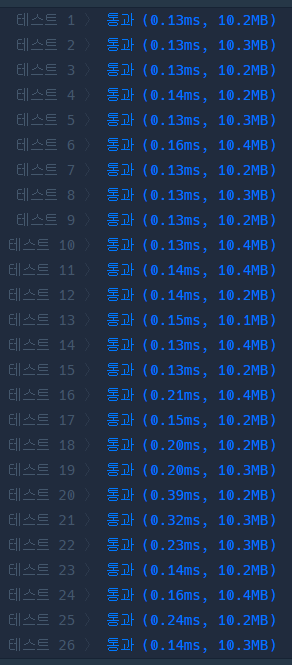

In [ ]:
import re

def remove_first_dot(string):
    if not string:
        return 'a'
    elif string[0] == '.':
        string = string[1:]
    return string

def remove_last_dot(string):
    if not string:
        return 'a'
    elif string[-1] == '.':
        string = string[:-1]
    return string

def solution(new_id):
    
    new_id = new_id.lower()
    new_id = re.sub(r'[^0-9a-z\-_.]','', new_id)
    new_id = re.sub(re.compile("\.+"),".", new_id)
    
    while True:
        new_id = new_id.replace('..', '.')        
        new_id = remove_first_dot(new_id)
        new_id = remove_last_dot(new_id)        
            
        length = len(new_id)
        if length >= 16:
            new_id = remove_last_dot(new_id[:15])
        elif length <= 2:
            extra = 3 - length
            last_w = new_id[-1]
            new_id += extra * last_w
        else:
            return new_id
            

### [키패드 누르기](https://school.programmers.co.kr/learn/courses/30/lessons/67256)

- 기존 코드 : 코드의 개념을 유지한 상태로, 보다 효율적으로 개선  
  
**point**
1. 문자열은 immutable 객체로, '+='로 업데이트할 때, O(n^2)의 시간 복잡도를 가짐
2. 이를 mutable 객체인 list로 처리하다가 마지막에 string 형태로 반환하는 식으로 수정

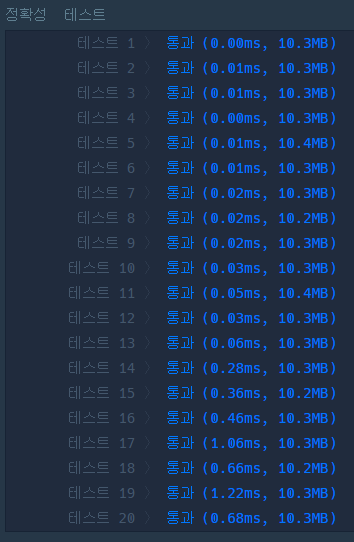

In [ ]:
def solution(numbers, hand):
    hands = {'L':'*', 'R':'#'}
    position = {1:(0,0), 2:(0,1), 3:(0,2), \
                4:(1,0), 5:(1,1), 6:(1,2), \
                7:(2,0), 8:(2,1), 9:(2,2), \
                '*':(3,0), 0:(3,1), '#':(3,2)}
    
    answer = ''
    for number in numbers:
        if number in [1,4,7]:
            result = 'left'
        elif number in [3,6,9]:
            result = 'right'
        else :
            number_idx = position[number]
            left_idx = position[hands['L']]
            right_idx = position[hands['R']]
            left_distance = sum([abs(x-y) for x, y in zip(number_idx, left_idx)])
            right_distance = sum([abs(x-y) for x, y in zip(number_idx, right_idx)])
            if left_distance == right_distance:
                result = hand
            elif left_distance < right_distance:
                result = 'left'
            else :
                result = 'right'
                
        if result == 'left':
            answer += 'L'
            hands['L'] = number
        else :
            answer += 'R'
            hands['R'] = number    
    
    return answer

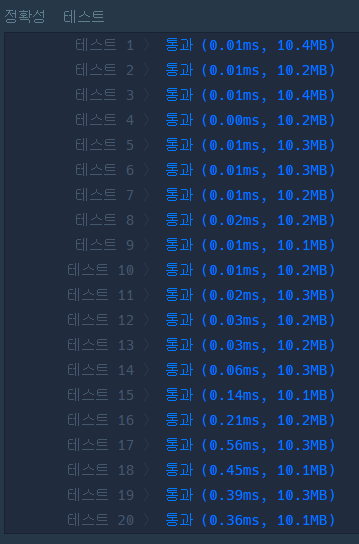

In [ ]:
def solution(numbers, hand):
    # 키패드의 각 키의 좌표를 미리 정의
    key_position = {
        1: (0, 0), 2: (0, 1), 3: (0, 2),
        4: (1, 0), 5: (1, 1), 6: (1, 2),
        7: (2, 0), 8: (2, 1), 9: (2, 2),
        '*': (3, 0), 0: (3, 1), '#': (3, 2)
    }
    
    # 왼손과 오른손의 초기 위치
    left_pos = key_position['*']
    right_pos = key_position['#']
    
    # 왼쪽과 오른쪽 열에 해당하는 숫자 집합
    left_keys = {1, 4, 7}
    right_keys = {3, 6, 9}
    
    answer = []
    
    for num in numbers:
        if num in left_keys:
            answer.append('L')
            left_pos = key_position[num]
        elif num in right_keys:
            answer.append('R')
            right_pos = key_position[num]
        else:
            # 가운데 열의 숫자들: 2, 5, 8, 0
            target = key_position[num]
            
            # 왼손과 오른손의 거리 계산
            left_distance = abs(target[0] - left_pos[0]) + abs(target[1] - left_pos[1])
            right_distance = abs(target[0] - right_pos[0]) + abs(target[1] - right_pos[1])
            
            if left_distance < right_distance:
                answer.append('L')
                left_pos = target
            elif left_distance > right_distance:
                answer.append('R')
                right_pos = target
            else:
                # 거리가 같은 경우 손잡이에 따라 결정
                if hand == 'left':
                    answer.append('L')
                    left_pos = target
                else:
                    answer.append('R')
                    right_pos = target
    
    return ''.join(answer)


### [성격유형 검사하기](https://school.programmers.co.kr/learn/courses/30/lessons/118666)

- 기존 코드 : 가독성 측면이나 성능 측면에서 충분해보임. 하드코딩으로 다른 스타일의 가독성과 약간의 성능 향상이 가능한지 테스트

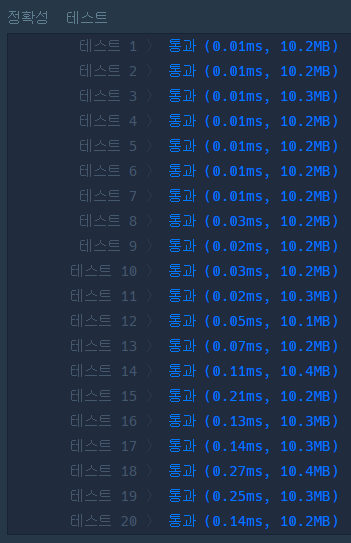

In [5]:
def solution(survey, choices):
    personalities = ['R', 'T', 'C', 'F', 'J', 'M', 'A', 'N']
    results = {p:0 for p in personalities}
    for s, c in zip(survey, choices):
        if c == 4:
            continue
        elif c < 4:
            results[s[0]] += 4-c
        else :
            results[s[1]] += c-4
    
    answer = ''
    for i in range(4):
        p1, p2 = personalities[i*2], personalities[i*2+1]
        r1, r2 = results[p1], results[p2]
        if r1 >= r2:
            answer += p1
        else :
            answer += p2
    
    return answer

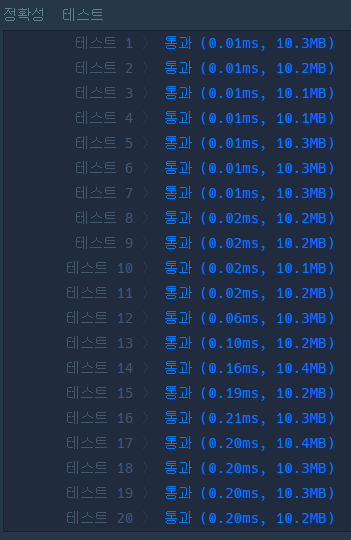

In [ ]:
def solution(survey, choices):
    scores = {
        'R': 0, 'T': 0,
        'C': 0, 'F': 0,
        'J': 0, 'M': 0,
        'A': 0, 'N': 0
    }
    
    for i in range(len(survey)):
        first, second = survey[i][0], survey[i][1]
        choice = choices[i]
        
        if choice < 4:
            scores[first] += 4 - choice
        elif choice > 4:
            scores[second] += choice - 4
    
    result = []
    
    if scores['R'] >= scores['T']:
        result.append('R')
    else:
        result.append('T')
    
    if scores['C'] >= scores['F']:
        result.append('C')
    else:
        result.append('F')
    
    if scores['J'] >= scores['M']:
        result.append('J')
    else:
        result.append('M')
    
    if scores['A'] >= scores['N']:
        result.append('A')
    else:
        result.append('N')
    
    return ''.join(result)

### [도둑질](https://school.programmers.co.kr/learn/courses/30/lessons/42897?language=python3)

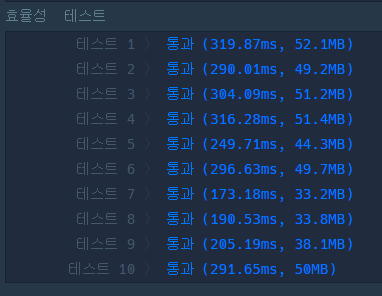

In [48]:
def solution(money):
    n = len(money)
    
    if n == 3:
        return max(money[0] + money[2], money[1])

    def rob_linear(money_list):
        prev = 0
        curr = 0
        for amount in money_list:
            temp = curr
            curr = max(curr, prev + amount)
            prev = temp
        return curr
    
    # Case 1: Exclude the last house
    money_case1 = money[:-1]
    max1 = rob_linear(money_case1)
    
    # Case 2: Exclude the first house
    money_case2 = money[1:]
    max2 = rob_linear(money_case2)
    
    return max(max1, max2)

In [49]:
money = [1,2,3,1]
solution(money)

4